# K-Means clustering algorithm


## What is K-means clustering?

"K-means stores $k$ centroids to define a cluster. A point is considered to be in a particular cluster if it is closer to that cluster's centroid than any other centroid.

K-Means finds the best centroids by alternating between (1) assigning data points to clusters based on the current centroids (2) chosing centroids (points which are the center of a cluster) based on the current assignment of data points to clusters.
(https://stanford.edu/~cpiech/cs221/handouts/kmeans.html)

## Step One:

Run the next cell to import dependencies.

In [1]:
import pandas as pd
from adtk.detector import MinClusterDetector
from sklearn.cluster import KMeans
from adtk.visualization import plot

## Step Two:

Convert data from one of the following sources:

- InfluxDB 

- CSV


### To convert from InfluxDB

Use the Python InfluxDB Client to query data and return it as a Panda DataFrame. For more information, [Getting Started with InfluxDB and Pandas](../Getting_Started_with_InfluxDB_and_Pandas.ipynb). Then continue to Step 3.

### To convert from CSV

Run the following code to convert csv data to a Panda DataFrame:

In [2]:
df = pd.read_csv("sample_data/KMEANS.csv")
df.head()

,_time,cpu-total,cpu0,cpu1,cpu2,cpu3,cpu4,cpu5,cpu6,cpu7,result,table
0,2020-06-18 18:00:04+00:00,12.310961,24.124124,5.700000,21.021021,4.100000,19.58042,3.4,17.482517,3.096903,_result,0
1,2020-06-18 18:00:14+00:00,12.298463,25.500000,4.700000,21.778222,3.696304,19.61962,3.3,17.200000,2.600000,_result,0
2,2020-06-18 18:00:24+00:00,12.173478,24.324324,5.394605,20.920921,4.104104,19.10000,3.4,17.000000,3.100000,_result,0
3,2020-06-18 18:00:34+00:00,11.979492,23.453094,5.405405,21.500000,3.900000,18.80000,3.5,16.316316,3.000000,_result,0
4,2020-06-18 18:00:44+00:00,10.750000,23.523524,3.996004,19.600000,2.400000,17.20000,2.1,15.500000,1.700000,_result,0


## Step Three: Prepare Data

To prepare your data, run the code in the next two cells to do the following:

- Drop extraneous columns
- Convert the timestamp to a [datetime object](https://docs.python.org/3/library/datetime.html)
- Move the timestamp column to the index

In [3]:
df["_time"] = pd.to_datetime(df["_time"].astype(str))
df = df.drop(columns=["result", "table"])
df = df.set_index("_time")
df.head()

,cpu-total,cpu0,cpu1,cpu2,cpu3,cpu4,cpu5,cpu6,cpu7
_time,,,,,,,,,
2020-06-18 18:00:04+00:00,12.310961,24.124124,5.700000,21.021021,4.100000,19.58042,3.4,17.482517,3.096903
2020-06-18 18:00:14+00:00,12.298463,25.500000,4.700000,21.778222,3.696304,19.61962,3.3,17.200000,2.600000
2020-06-18 18:00:24+00:00,12.173478,24.324324,5.394605,20.920921,4.104104,19.10000,3.4,17.000000,3.100000
2020-06-18 18:00:34+00:00,11.979492,23.453094,5.405405,21.500000,3.900000,18.80000,3.5,16.316316,3.000000
2020-06-18 18:00:44+00:00,10.750000,23.523524,3.996004,19.600000,2.400000,17.20000,2.1,15.500000,1.700000


## Step Four: Apply KMeans

Use the MinClusterDetector function apply KMEANs to your data to find anomoalies. 

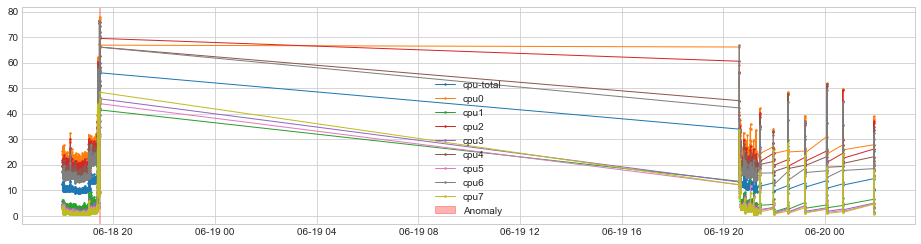

In [4]:
min_cluster_detector = MinClusterDetector(KMeans(n_clusters=12))
anomalies = min_cluster_detector.fit_detect(df)
plot(df, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_color='red', anomaly_alpha=0.3, curve_group='all');